In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_json('training/EXIST2023_training.json')
df=df.transpose()
spanish=df.loc[df['lang']=='es']

In [3]:
english=df.loc[df['lang']=='en']
english

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
200001,200001,en,FFS! How about laying the blame on the bastard...,6,"[Annotator_391, Annotator_392, Annotator_393, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, NO, YES, NO]","[JUDGEMENTAL, JUDGEMENTAL, -, -, REPORTED, -]","[[MISOGYNY-NON-SEXUAL-VIOLENCE], [SEXUAL-VIOLE...",TRAIN_EN
200002,200002,en,Writing a uni essay in my local pub with a cof...,6,"[Annotator_391, Annotator_392, Annotator_393, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, NO, YES, YES]","[REPORTED, DIRECT, REPORTED, -, REPORTED, REPO...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, MIS...",TRAIN_EN
200003,200003,en,@UniversalORL it is 2021 not 1921. I dont appr...,6,"[Annotator_397, Annotator_398, Annotator_399, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, NO, YES]","[REPORTED, REPORTED, -, REPORTED, -, JUDGEMENTAL]","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [STEREOTY...",TRAIN_EN
200004,200004,en,@GMB this is unacceptable. Use her title as yo...,6,"[Annotator_403, Annotator_404, Annotator_405, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, NO, NO]","[REPORTED, JUDGEMENTAL, -, JUDGEMENTAL, -, -]","[[MISOGYNY-NON-SEXUAL-VIOLENCE], [STEREOTYPING...",TRAIN_EN
200005,200005,en,‘Making yourself a harder target’ basically bo...,6,"[Annotator_409, Annotator_410, Annotator_411, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, NO, NO, YES]","[JUDGEMENTAL, DIRECT, -, -, -, DIRECT]","[[SEXUAL-VIOLENCE, MISOGYNY-NON-SEXUAL-VIOLENC...",TRAIN_EN
...,...,...,...,...,...,...,...,...,...,...,...
203256,203256,en,idk why y’all bitches think having half your a...,6,"[Annotator_478, Annotator_479, Annotator_480, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, DIRECT, DIRECT, DIRECT, JUDGEMEN...","[[OBJECTIFICATION], [STEREOTYPING-DOMINANCE, S...",TRAIN_EN
203257,203257,en,This has been a part of an experiment with @Wo...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, JUDGEMENTAL, DIRECT, J...","[[OBJECTIFICATION], [OBJECTIFICATION], [OBJECT...",TRAIN_EN
203258,203258,en,"""Take me already"" ""Not yet. You gotta be ready...",6,"[Annotator_467, Annotator_468, Annotator_469, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, YES, YES]","[-, DIRECT, -, DIRECT, DIRECT, JUDGEMENTAL]","[[-], [OBJECTIFICATION], [-], [SEXUAL-VIOLENCE...",TRAIN_EN
203259,203259,en,@clintneedcoffee why do you look like a whore?...,6,"[Annotator_674, Annotator_675, Annotator_676, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, JUDGEMENTAL, ...","[[OBJECTIFICATION, SEXUAL-VIOLENCE, MISOGYNY-N...",TRAIN_EN


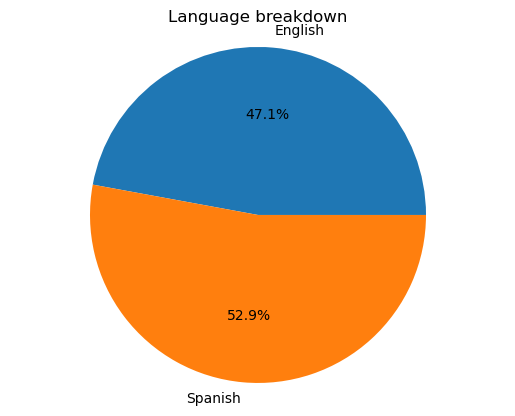

In [4]:
lang_size=[len(english),len(spanish)]
labels='English','Spanish'
plt.pie(lang_size,
       labels = labels,autopct='%1.1f%%',startangle=0)
plt.title('Language breakdown')
plt.axis('equal')
plt.show()

In [5]:
sexist=df.loc[df['labels_task1'].apply(lambda x:x.count('YES'))>3]
sexist

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
100005,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES
100008,100008,es,@BestKabest Esta gringa sigue llorando por el ...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, JUDGEMENTAL, DIRECT, ...","[[IDEOLOGICAL-INEQUALITY], [STEREOTYPING-DOMIN...",TRAIN_ES
100028,100028,es,"@ShahidForChange @TeamPelosi Quiet, sexist ^%$...",6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, NO, YES, YES, YES]","[JUDGEMENTAL, -, -, DIRECT, DIRECT, DIRECT]","[[STEREOTYPING-DOMINANCE], [-], [-], [IDEOLOGI...",TRAIN_ES
100036,100036,es,@Harassed_girl loca d mierda en k momento,6,"[Annotator_115, Annotator_116, Annotator_117, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, NO]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, -]","[[STEREOTYPING-DOMINANCE, SEXUAL-VIOLENCE], [M...",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
203256,203256,en,idk why y’all bitches think having half your a...,6,"[Annotator_478, Annotator_479, Annotator_480, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, DIRECT, DIRECT, DIRECT, JUDGEMEN...","[[OBJECTIFICATION], [STEREOTYPING-DOMINANCE, S...",TRAIN_EN
203257,203257,en,This has been a part of an experiment with @Wo...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, JUDGEMENTAL, DIRECT, J...","[[OBJECTIFICATION], [OBJECTIFICATION], [OBJECT...",TRAIN_EN
203258,203258,en,"""Take me already"" ""Not yet. You gotta be ready...",6,"[Annotator_467, Annotator_468, Annotator_469, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, YES, YES]","[-, DIRECT, -, DIRECT, DIRECT, JUDGEMENTAL]","[[-], [OBJECTIFICATION], [-], [SEXUAL-VIOLENCE...",TRAIN_EN
203259,203259,en,@clintneedcoffee why do you look like a whore?...,6,"[Annotator_674, Annotator_675, Annotator_676, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, JUDGEMENTAL, ...","[[OBJECTIFICATION, SEXUAL-VIOLENCE, MISOGYNY-N...",TRAIN_EN


In [6]:
non_sexist=df.loc[df['labels_task1'].apply(lambda x:x.count('YES'))<3]
non_sexist

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES
100003,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100006,100006,es,@yonkykong Aaah sí. Andrew Dobson. El que se d...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100009,100009,es,.¿Conoces la #DECORACION #estilo #GAMER para #...,6,"[Annotator_31, Annotator_32, Annotator_33, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100010,100010,es,CES 2022 ASUS ROG Rise of Gamers Evento de lan...,6,"[Annotator_37, Annotator_38, Annotator_39, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, NO, NO]","[-, -, DIRECT, -, -, -]","[[-], [-], [STEREOTYPING-DOMINANCE], [-], [-],...",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
203180,203180,en,"@BFriedmanDC ""The other officers yell after Jo...",6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, NO, NO]","[-, REPORTED, -, -, -, -]","[[-], [STEREOTYPING-DOMINANCE], [-], [-], [-],...",TRAIN_EN
203201,203201,en,@v1sig0th @PTSDGuts2 Get off your goddamn high...,6,"[Annotator_508, Annotator_509, Annotator_510, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, YES, NO]","[-, DIRECT, -, -, DIRECT, -]","[[-], [SEXUAL-VIOLENCE], [-], [-], [STEREOTYPI...",TRAIN_EN
203202,203202,en,I hate the phrase “when you assume it makes an...,6,"[Annotator_703, Annotator_704, Annotator_705, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, NO, NO]","[-, DIRECT, -, DIRECT, -, -]","[[-], [OBJECTIFICATION], [-], [STEREOTYPING-DO...",TRAIN_EN
203205,203205,en,To the guy who beeped at me after I'd put my h...,6,"[Annotator_645, Annotator_646, Annotator_647, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, NO, NO, NO, YES, NO]","[REPORTED, -, -, -, DIRECT, -]","[[STEREOTYPING-DOMINANCE], [-], [-], [-], [STE...",TRAIN_EN


In [7]:
ambiguous=df.loc[df['labels_task1'].apply(lambda x:x.count('YES'))==3]
ambiguous

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100004,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"[Annotator_13, Annotator_14, Annotator_15, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",TRAIN_ES
100007,100007,es,@glutamatom @JoaquinAdolfoC Estaba del lado de...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, YES, YES, NO, NO, YES]","[-, UNKNOWN, DIRECT, -, -, DIRECT]","[[-], [UNKNOWN], [MISOGYNY-NON-SEXUAL-VIOLENCE...",TRAIN_ES
100025,100025,es,@myglookhere las mujeres no deberíamos vivir c...,6,"[Annotator_97, Annotator_98, Annotator_99, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, NO, YES, YES, NO]","[JUDGEMENTAL, -, -, JUDGEMENTAL, JUDGEMENTAL, -]","[[MISOGYNY-NON-SEXUAL-VIOLENCE], [-], [-], [SE...",TRAIN_ES
100026,100026,es,"Ya son las 00:00 en arabia, por favor difundan...",6,"[Annotator_103, Annotator_104, Annotator_105, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, YES, NO, YES]","[-, -, REPORTED, REPORTED, -, JUDGEMENTAL]","[[-], [-], [OBJECTIFICATION], [STEREOTYPING-DO...",TRAIN_ES
100030,100030,es,"@Quora Is a great example of this, they don't ...",6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, NO, NO]","[REPORTED, REPORTED, -, REPORTED, -, -]","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, SEX...",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
203217,203217,en,Wafc honest take of today…….long ball side doe...,6,"[Annotator_651, Annotator_652, Annotator_653, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, YES, YES, YES]","[-, -, -, DIRECT, DIRECT, DIRECT]","[[-], [-], [-], [STEREOTYPING-DOMINANCE, OBJEC...",TRAIN_EN
203219,203219,en,you ever go to press qrt but then you rt but i...,6,"[Annotator_680, Annotator_681, Annotator_682, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, DIRECT, DIRECT]","[[-], [-], [SEXUAL-VIOLENCE], [-], [SEXUAL-VIO...",TRAIN_EN
203220,203220,en,@SzMarsupial @mountain_ghosts Well admitting t...,6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, NO, NO]","[DIRECT, DIRECT, -, DIRECT, -, -]","[[STEREOTYPING-DOMINANCE], [SEXUAL-VIOLENCE, M...",TRAIN_EN
203238,203238,en,"@Bobbywade31 @DavidMcGovern In other words, if...",6,"[Annotator_674, Annotator_675, Annotator_676, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, YES, YES, YES]","[-, -, -, JUDGEMENTAL, DIRECT, JUDGEMENTAL]","[[-], [-], [-], [IDEOLOGICAL-INEQUALITY], [IDE...",TRAIN_EN


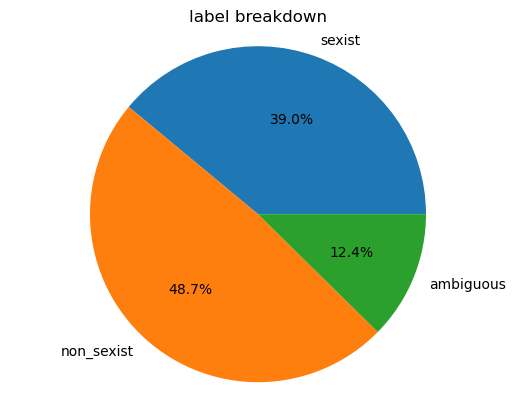

In [8]:
lang_size=[len(sexist),len(non_sexist),len(ambiguous)]
labels='sexist','non_sexist','ambiguous'
plt.pie(lang_size,
       labels = labels,autopct='%1.1f%%',startangle=0)
plt.title('label breakdown')
plt.axis('equal')
plt.show()

In [9]:
sexist_en=sexist.loc[sexist.lang=='en']
sexist_en

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
200002,200002,en,Writing a uni essay in my local pub with a cof...,6,"[Annotator_391, Annotator_392, Annotator_393, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, NO, YES, YES]","[REPORTED, DIRECT, REPORTED, -, REPORTED, REPO...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, MIS...",TRAIN_EN
200003,200003,en,@UniversalORL it is 2021 not 1921. I dont appr...,6,"[Annotator_397, Annotator_398, Annotator_399, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, NO, YES]","[REPORTED, REPORTED, -, REPORTED, -, JUDGEMENTAL]","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [STEREOTY...",TRAIN_EN
200006,200006,en,According to a customer I have plenty of time ...,6,"[Annotator_409, Annotator_410, Annotator_411, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, REPORTED, REPORTED, REPORTED, REPOR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [S...",TRAIN_EN
200007,200007,en,"So only 'blokes' drink beer? Sorry, but if you...",6,"[Annotator_415, Annotator_416, Annotator_417, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, REPORTED, DIRECT, DIRE...","[[STEREOTYPING-DOMINANCE], [STEREOTYPING-DOMIN...",TRAIN_EN
200011,200011,en,#EverydaySexism means women usually end up in ...,6,"[Annotator_437, Annotator_438, Annotator_439, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, JUDGEMENTAL, JUDGEMENTAL, JUDGEMENT...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN_EN
...,...,...,...,...,...,...,...,...,...,...,...
203256,203256,en,idk why y’all bitches think having half your a...,6,"[Annotator_478, Annotator_479, Annotator_480, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, DIRECT, DIRECT, DIRECT, JUDGEMEN...","[[OBJECTIFICATION], [STEREOTYPING-DOMINANCE, S...",TRAIN_EN
203257,203257,en,This has been a part of an experiment with @Wo...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, JUDGEMENTAL, DIRECT, J...","[[OBJECTIFICATION], [OBJECTIFICATION], [OBJECT...",TRAIN_EN
203258,203258,en,"""Take me already"" ""Not yet. You gotta be ready...",6,"[Annotator_467, Annotator_468, Annotator_469, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, YES, YES]","[-, DIRECT, -, DIRECT, DIRECT, JUDGEMENTAL]","[[-], [OBJECTIFICATION], [-], [SEXUAL-VIOLENCE...",TRAIN_EN
203259,203259,en,@clintneedcoffee why do you look like a whore?...,6,"[Annotator_674, Annotator_675, Annotator_676, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, JUDGEMENTAL, ...","[[OBJECTIFICATION, SEXUAL-VIOLENCE, MISOGYNY-N...",TRAIN_EN


In [10]:
sexist_es=sexist.loc[sexist.lang=='es']
sexist_es

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
100005,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES
100008,100008,es,@BestKabest Esta gringa sigue llorando por el ...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, JUDGEMENTAL, DIRECT, ...","[[IDEOLOGICAL-INEQUALITY], [STEREOTYPING-DOMIN...",TRAIN_ES
100028,100028,es,"@ShahidForChange @TeamPelosi Quiet, sexist ^%$...",6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, NO, YES, YES, YES]","[JUDGEMENTAL, -, -, DIRECT, DIRECT, DIRECT]","[[STEREOTYPING-DOMINANCE], [-], [-], [IDEOLOGI...",TRAIN_ES
100036,100036,es,@Harassed_girl loca d mierda en k momento,6,"[Annotator_115, Annotator_116, Annotator_117, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, NO]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, -]","[[STEREOTYPING-DOMINANCE, SEXUAL-VIOLENCE], [M...",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
103655,103655,es,"que envidia me dan las dos zorras estas, yo de...",6,"[Annotator_295, Annotator_296, Annotator_297, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, NO, YES, YES]","[JUDGEMENTAL, DIRECT, DIRECT, -, DIRECT, DIRECT]","[[MISOGYNY-NON-SEXUAL-VIOLENCE], [MISOGYNY-NON...",TRAIN_ES
103656,103656,es,Los hombres sieeeempre dicen que si fueran muj...,6,"[Annotator_265, Annotator_266, Annotator_267, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, NO, YES]","[JUDGEMENTAL, JUDGEMENTAL, DIRECT, REPORTED, -...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [S...",TRAIN_ES
103657,103657,es,@dat_mauro Estas zorras qls siempre preocupada...,6,"[Annotator_223, Annotator_224, Annotator_225, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[DIRECT, DIRECT, -, DIRECT, JUDGEMENTAL, DIRECT]","[[MISOGYNY-NON-SEXUAL-VIOLENCE], [IDEOLOGICAL-...",TRAIN_ES
103658,103658,es,A pesar de que convenga que las Zorras jueguen...,6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, YES, YES, YES, YES, YES]","[-, DIRECT, DIRECT, DIRECT, DIRECT, DIRECT]","[[-], [OBJECTIFICATION, SEXUAL-VIOLENCE], [STE...",TRAIN_ES


In [11]:
non_sexist_en=non_sexist.loc[non_sexist.lang=="en"]
non_sexist_en

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
200008,200008,en,New to the shelves this week - looking forward...,6,"[Annotator_420, Annotator_296, Annotator_421, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, YES, NO, NO]","[-, -, -, JUDGEMENTAL, -, -]","[[-], [-], [-], [IDEOLOGICAL-INEQUALITY], [-],...",TRAIN_EN
200010,200010,en,I guess that’s fairly normal for a Neanderthal...,6,"[Annotator_431, Annotator_432, Annotator_433, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, JUDGEMENTAL, -]","[[-], [-], [-], [-], [OBJECTIFICATION, SEXUAL-...",TRAIN_EN
200023,200023,en,@JavedLSterritt He's really shit on games jour...,6,"[Annotator_496, Annotator_497, Annotator_498, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, YES, NO, NO]","[-, -, -, JUDGEMENTAL, -, -]","[[-], [-], [-], [IDEOLOGICAL-INEQUALITY, STERE...",TRAIN_EN
200024,200024,en,"Low key, she was fr created because the Incred...",6,"[Annotator_502, Annotator_503, Annotator_504, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, NO, YES]","[-, -, -, -, -, JUDGEMENTAL]","[[-], [-], [-], [-], [-], [STEREOTYPING-DOMINA...",TRAIN_EN
200025,200025,en,"One of the most important (and of course, unde...",6,"[Annotator_508, Annotator_509, Annotator_510, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_EN
...,...,...,...,...,...,...,...,...,...,...,...
203180,203180,en,"@BFriedmanDC ""The other officers yell after Jo...",6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, NO, NO]","[-, REPORTED, -, -, -, -]","[[-], [STEREOTYPING-DOMINANCE], [-], [-], [-],...",TRAIN_EN
203201,203201,en,@v1sig0th @PTSDGuts2 Get off your goddamn high...,6,"[Annotator_508, Annotator_509, Annotator_510, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, YES, NO]","[-, DIRECT, -, -, DIRECT, -]","[[-], [SEXUAL-VIOLENCE], [-], [-], [STEREOTYPI...",TRAIN_EN
203202,203202,en,I hate the phrase “when you assume it makes an...,6,"[Annotator_703, Annotator_704, Annotator_705, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, NO, NO]","[-, DIRECT, -, DIRECT, -, -]","[[-], [OBJECTIFICATION], [-], [STEREOTYPING-DO...",TRAIN_EN
203205,203205,en,To the guy who beeped at me after I'd put my h...,6,"[Annotator_645, Annotator_646, Annotator_647, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, NO, NO, NO, YES, NO]","[REPORTED, -, -, -, DIRECT, -]","[[STEREOTYPING-DOMINANCE], [-], [-], [-], [STE...",TRAIN_EN


In [12]:
non_sexist_es=non_sexist.loc[non_sexist.lang=="es"]
non_sexist_es

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES
100003,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100006,100006,es,@yonkykong Aaah sí. Andrew Dobson. El que se d...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100009,100009,es,.¿Conoces la #DECORACION #estilo #GAMER para #...,6,"[Annotator_31, Annotator_32, Annotator_33, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100010,100010,es,CES 2022 ASUS ROG Rise of Gamers Evento de lan...,6,"[Annotator_37, Annotator_38, Annotator_39, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, NO, NO]","[-, -, DIRECT, -, -, -]","[[-], [-], [STEREOTYPING-DOMINANCE], [-], [-],...",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
103616,103616,es,"@petrogustavo Doctor ... repito, los niños que...",6,"[Annotator_139, Annotator_140, Annotator_141, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, YES, NO]","[-, -, REPORTED, -, DIRECT, -]","[[-], [-], [SEXUAL-VIOLENCE], [-], [IDEOLOGICA...",TRAIN_ES
103619,103619,es,"La Argentina explotada por todos lados, pero p...",6,"[Annotator_313, Annotator_314, Annotator_315, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
103620,103620,es,Hoy con testigos el Presidente López violó la ...,6,"[Annotator_229, Annotator_230, Annotator_231, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
103639,103639,es,cahcake ya casi queda poco para el años zorra ...,6,"[Annotator_211, Annotator_212, Annotator_213, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, YES, YES, NO, NO, NO]","[-, DIRECT, JUDGEMENTAL, -, -, -]","[[-], [MISOGYNY-NON-SEXUAL-VIOLENCE], [OBJECTI...",TRAIN_ES


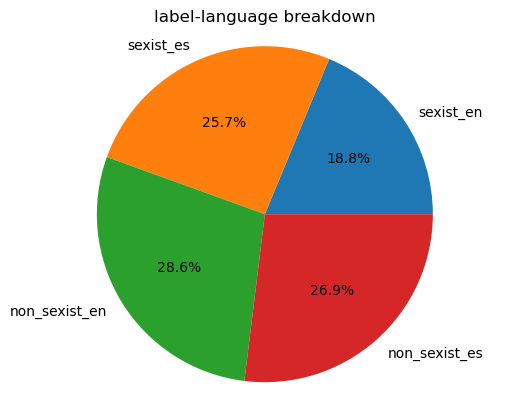

In [13]:
lang_size=[len(sexist_en),len(sexist_es),len(non_sexist_en),len(non_sexist_es)]
labels='sexist_en','sexist_es','non_sexist_en','non_sexist_es'
plt.pie(lang_size,
       labels = labels,autopct='%1.1f%%',startangle=0)
plt.title('label-language breakdown')
plt.axis('equal')
plt.show()

In [14]:
annotators=df.annotators.to_numpy().flatten().tolist()

In [15]:
genders=df.gender_annotators.to_numpy().flatten().tolist()
ages=df.age_annotators.to_numpy().flatten().tolist()
opinions=df.labels_task1.to_numpy().flatten().tolist()

In [16]:
Yes0=df.loc[df['labels_task1'].apply(lambda x:x.count('YES'))==0]
Yes0

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100003,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100006,100006,es,@yonkykong Aaah sí. Andrew Dobson. El que se d...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100009,100009,es,.¿Conoces la #DECORACION #estilo #GAMER para #...,6,"[Annotator_31, Annotator_32, Annotator_33, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100011,100011,es,"@Lorebrou16 @arrobaDonko Mierda, me siento vie...",6,"[Annotator_37, Annotator_38, Annotator_39, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100012,100012,es,@Recuenco @qlopdopis Bannon tiene también hist...,6,"[Annotator_43, Annotator_44, Annotator_45, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
203173,203173,en,Gonna scream and yell I just saw squid game sp...,6,"[Annotator_590, Annotator_591, Annotator_592, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_EN
203174,203174,en,@kankurous Please sir I have mental illness yo...,6,"[Annotator_415, Annotator_416, Annotator_417, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_EN
203175,203175,en,@01benno @YourAnonOne Respect let russia see t...,6,"[Annotator_578, Annotator_579, Annotator_580, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_EN
203178,203178,en,@sad_daad Me and spongebob got alot in common ...,6,"[Annotator_425, Annotator_426, Annotator_427, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_EN


In [17]:
Yes1=df.loc[df['labels_task1'].apply(lambda x:x.count('YES'))==1]
Yes1


,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES
100010,100010,es,CES 2022 ASUS ROG Rise of Gamers Evento de lan...,6,"[Annotator_37, Annotator_38, Annotator_39, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, NO, NO]","[-, -, DIRECT, -, -, -]","[[-], [-], [STEREOTYPING-DOMINANCE], [-], [-],...",TRAIN_ES
100014,100014,es,"«Hasta ese momento la izquierda, mucho más pol...",6,"[Annotator_43, Annotator_44, Annotator_45, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, YES]","[-, -, -, -, -, DIRECT]","[[-], [-], [-], [-], [-], [IDEOLOGICAL-INEQUAL...",TRAIN_ES
100015,100015,es,¿Y por qué digo que son dogwhistles? Porque es...,6,"[Annotator_49, Annotator_50, Annotator_51, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, NO, NO]","[-, -, REPORTED, -, -, -]","[[-], [-], [SEXUAL-VIOLENCE], [-], [-], [-]]",TRAIN_ES
100017,100017,es,La que se levanto sin miedo al exito fue la ra...,6,"[Annotator_61, Annotator_62, Annotator_63, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, YES]","[-, -, -, -, -, DIRECT]","[[-], [-], [-], [-], [-], [OBJECTIFICATION]]",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
203163,203163,en,@Crimson_Mayhem_ People really overexaggerate ...,6,"[Annotator_508, Annotator_509, Annotator_510, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, YES, NO, NO, NO]","[-, -, DIRECT, -, -, -]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [-],...",TRAIN_EN
203167,203167,en,i knew the comment section was going to be goo...,6,"[Annotator_662, Annotator_663, Annotator_664, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, NO, NO, NO, NO, NO]","[REPORTED, -, -, -, -, -]","[[MISOGYNY-NON-SEXUAL-VIOLENCE], [-], [-], [-]...",TRAIN_EN
203169,203169,en,@snotgrrl_ Eliminate all essayist. Only debate...,6,"[Annotator_525, Annotator_526, Annotator_527, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, YES, NO, NO, NO]","[-, -, DIRECT, -, -, -]","[[-], [-], [STEREOTYPING-DOMINANCE], [-], [-],...",TRAIN_EN
203170,203170,en,The same people who yell defund the police and...,6,"[Annotator_525, Annotator_526, Annotator_527, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, YES, NO, NO, NO]","[-, -, JUDGEMENTAL, -, -, -]","[[-], [-], [OBJECTIFICATION], [-], [-], [-]]",TRAIN_EN


In [18]:
Yes2=df.loc[df['labels_task1'].apply(lambda x:x.count('YES'))==2]
Yes2

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100016,100016,es,@razrainy cuando te toque experimentar algo si...,6,"[Annotator_55, Annotator_56, Annotator_57, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, YES, NO, NO]","[-, -, REPORTED, DIRECT, -, -]","[[-], [-], [STEREOTYPING-DOMINANCE, OBJECTIFIC...",TRAIN_ES
100021,100021,es,The gays despues de escuchar babylon house lab...,6,"[Annotator_85, Annotator_86, Annotator_87, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, YES, NO, YES]","[-, -, -, DIRECT, -, DIRECT]","[[-], [-], [-], [IDEOLOGICAL-INEQUALITY], [-],...",TRAIN_ES
100023,100023,es,@touronja lol yo me metí en un lío con esa com...,6,"[Annotator_91, Annotator_92, Annotator_93, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, YES]","[-, -, -, -, REPORTED, DIRECT]","[[-], [-], [-], [-], [OBJECTIFICATION], [STERE...",TRAIN_ES
100031,100031,es,this artist is only 20. that is so young to be...,6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, NO, YES, NO, NO]","[JUDGEMENTAL, -, -, DIRECT, -, -]","[[MISOGYNY-NON-SEXUAL-VIOLENCE], [-], [-], [ID...",TRAIN_ES
100033,100033,es,"She harassed the Senator, así que váyanse a ma...",6,"[Annotator_67, Annotator_68, Annotator_69, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, YES, YES, NO]","[-, -, -, JUDGEMENTAL, JUDGEMENTAL, -]","[[-], [-], [-], [OBJECTIFICATION], [IDEOLOGICA...",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
203160,203160,en,Sorry for this tweet about womyn on internatio...,6,"[Annotator_645, Annotator_646, Annotator_647, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, YES, NO, NO, NO]","[-, DIRECT, JUDGEMENTAL, -, -, -]","[[-], [IDEOLOGICAL-INEQUALITY, MISOGYNY-NON-SE...",TRAIN_EN
203201,203201,en,@v1sig0th @PTSDGuts2 Get off your goddamn high...,6,"[Annotator_508, Annotator_509, Annotator_510, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, YES, NO]","[-, DIRECT, -, -, DIRECT, -]","[[-], [SEXUAL-VIOLENCE], [-], [-], [STEREOTYPI...",TRAIN_EN
203202,203202,en,I hate the phrase “when you assume it makes an...,6,"[Annotator_703, Annotator_704, Annotator_705, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, NO, NO]","[-, DIRECT, -, DIRECT, -, -]","[[-], [OBJECTIFICATION], [-], [STEREOTYPING-DO...",TRAIN_EN
203205,203205,en,To the guy who beeped at me after I'd put my h...,6,"[Annotator_645, Annotator_646, Annotator_647, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, NO, NO, NO, YES, NO]","[REPORTED, -, -, -, DIRECT, -]","[[STEREOTYPING-DOMINANCE], [-], [-], [-], [STE...",TRAIN_EN


In [19]:
Yes4=df.loc[df['labels_task1'].apply(lambda x:x.count('YES'))==4]
Yes4

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100005,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES
100028,100028,es,"@ShahidForChange @TeamPelosi Quiet, sexist ^%$...",6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, NO, YES, YES, YES]","[JUDGEMENTAL, -, -, DIRECT, DIRECT, DIRECT]","[[STEREOTYPING-DOMINANCE], [-], [-], [IDEOLOGI...",TRAIN_ES
100042,100042,es,@DavidSpringMan @Tuices @JessicaFillol Pues mi...,6,"[Annotator_127, Annotator_128, Annotator_129, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, YES, YES, NO, YES, YES]","[-, REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEM...","[[-], [IDEOLOGICAL-INEQUALITY, SEXUAL-VIOLENCE...",TRAIN_ES
100047,100047,es,Caso #LaManada: Heredia es la abogada de la ví...,6,"[Annotator_145, Annotator_146, Annotator_147, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, NO, YES, YES]","[DIRECT, REPORTED, -, -, JUDGEMENTAL, REPORTED]","[[SEXUAL-VIOLENCE], [SEXUAL-VIOLENCE], [-], [-...",TRAIN_ES
100048,100048,es,"Alejandro Saavedra, violador parte de #laManad...",6,"[Annotator_37, Annotator_38, Annotator_39, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, YES, YES, YES, NO, YES]","[-, REPORTED, REPORTED, REPORTED, -, REPORTED]","[[-], [SEXUAL-VIOLENCE], [MISOGYNY-NON-SEXUAL-...",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
203237,203237,en,"Blanche: Oh, Sophia. How nice to see you. S...",6,"[Annotator_674, Annotator_675, Annotator_676, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, DIRECT, -, REPORTED, REPORTED]","[[OBJECTIFICATION], [-], [OBJECTIFICATION], [-...",TRAIN_EN
203240,203240,en,@BruinJustine @CortesSteve @GregAbbott_TX You ...,6,"[Annotator_680, Annotator_681, Annotator_682, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, NO, YES, NO]","[DIRECT, DIRECT, DIRECT, -, DIRECT, -]","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [OBJECTIF...",TRAIN_EN
203244,203244,en,I put on gages and my girlfriend looks me in t...,6,"[Annotator_425, Annotator_426, Annotator_427, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, NO, YES, YES]","[JUDGEMENTAL, REPORTED, -, -, DIRECT, DIRECT]","[[IDEOLOGICAL-INEQUALITY], [OBJECTIFICATION], ...",TRAIN_EN
203255,203255,en,I forgot I have a m*d that changes the drachen...,6,"[Annotator_674, Annotator_675, Annotator_676, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, YES, YES, YES, YES]","[-, -, DIRECT, JUDGEMENTAL, JUDGEMENTAL, DIRECT]","[[-], [-], [OBJECTIFICATION], [IDEOLOGICAL-INE...",TRAIN_EN


In [20]:
Yes5=df.loc[df['labels_task1'].apply(lambda x:x.count('YES'))==5]
Yes5

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
100036,100036,es,@Harassed_girl loca d mierda en k momento,6,"[Annotator_115, Annotator_116, Annotator_117, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, NO]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, -]","[[STEREOTYPING-DOMINANCE, SEXUAL-VIOLENCE], [M...",TRAIN_ES
100038,100038,es,@spacland encima siempre a la misma pobre tisi...,6,"[Annotator_115, Annotator_116, Annotator_117, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, NO]","[REPORTED, JUDGEMENTAL, DIRECT, REPORTED, DIRE...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [S...",TRAIN_ES
100044,100044,es,@jmrane #Lamanada (agresión sexual en Navarra)...,6,"[Annotator_91, Annotator_92, Annotator_93, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, YES, YES, YES, YES, YES]","[-, REPORTED, REPORTED, REPORTED, JUDGEMENTAL,...","[[-], [SEXUAL-VIOLENCE], [SEXUAL-VIOLENCE], [S...",TRAIN_ES
100060,100060,es,Lo de Lopetegui en rueda de prensa diciendo no...,6,"[Annotator_55, Annotator_56, Annotator_57, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, NO, YES]","[JUDGEMENTAL, DIRECT, JUDGEMENTAL, DIRECT, -, ...","[[OBJECTIFICATION], [SEXUAL-VIOLENCE], [STEREO...",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
203248,203248,en,me to the cat: don't stick your ass up like th...,6,"[Annotator_265, Annotator_709, Annotator_710, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, NO, YES, YES]","[DIRECT, DIRECT, DIRECT, -, DIRECT, DIRECT]","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [MISOGYNY...",TRAIN_EN
203249,203249,en,“wow you look like a whore”“thank you!”😂😂😂,6,"[Annotator_467, Annotator_468, Annotator_469, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, YES, YES]","[DIRECT, REPORTED, -, DIRECT, DIRECT, JUDGEMEN...","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [OBJECTIF...",TRAIN_EN
203252,203252,en,“You look like a whore” if you think I’m cute ...,6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, YES, YES]","[DIRECT, DIRECT, -, DIRECT, JUDGEMENTAL, JUDGE...","[[SEXUAL-VIOLENCE], [MISOGYNY-NON-SEXUAL-VIOLE...",TRAIN_EN
203254,203254,en,@ShefVaidya Ma'am if I say that you look like ...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, YES, YES]","[DIRECT, DIRECT, -, REPORTED, DIRECT, JUDGEMEN...","[[OBJECTIFICATION, MISOGYNY-NON-SEXUAL-VIOLENC...",TRAIN_EN


In [21]:
Yes6=df.loc[df['labels_task1'].apply(lambda x:x.count('YES'))==6]
Yes6

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100008,100008,es,@BestKabest Esta gringa sigue llorando por el ...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, JUDGEMENTAL, DIRECT, ...","[[IDEOLOGICAL-INEQUALITY], [STEREOTYPING-DOMIN...",TRAIN_ES
100071,100071,es,#PorSiNoLoViste #Espectaculos #Acoso #MeToo 🟣L...,6,"[Annotator_205, Annotator_206, Annotator_207, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[REPORTED, REPORTED, REPORTED, REPORTED, REPOR...","[[STEREOTYPING-DOMINANCE, SEXUAL-VIOLENCE], [S...",TRAIN_ES
100076,100076,es,EL #METOO Y EL MUNDO LITERARIO | Acosadores: l...,6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[REPORTED, DIRECT, REPORTED, REPORTED, REPORTE...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN_ES
100089,100089,es,@Pretorian_MGTOW No se que le pasó a ésta muje...,6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[DIRECT, JUDGEMENTAL, DIRECT, DIRECT, DIRECT, ...","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [STEREOTY...",TRAIN_ES
100110,100110,es,"Y recuerden que decir ""No todos los hombres"" n...",6,"[Annotator_151, Annotator_152, Annotator_153, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, JUDGEMENTAL, DIRECT, REPORTED, R...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN_ES
...,...,...,...,...,...,...,...,...,...,...,...
203251,203251,en,"""you look like a whore"" I'm literally wearing ...",6,"[Annotator_473, Annotator_474, Annotator_475, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, REPORTED, REPORTED, DIRECT, REPORTE...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [O...",TRAIN_EN
203253,203253,en,Who fucking lied to you? You look like a whore...,6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DIRECT]","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_EN
203256,203256,en,idk why y’all bitches think having half your a...,6,"[Annotator_478, Annotator_479, Annotator_480, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, DIRECT, DIRECT, DIRECT, JUDGEMEN...","[[OBJECTIFICATION], [STEREOTYPING-DOMINANCE, S...",TRAIN_EN
203257,203257,en,This has been a part of an experiment with @Wo...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, JUDGEMENTAL, DIRECT, J...","[[OBJECTIFICATION], [OBJECTIFICATION], [OBJECT...",TRAIN_EN


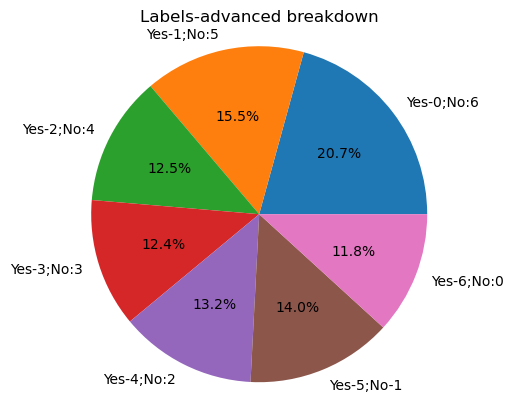

In [22]:
lang_size=[len(Yes0),len(Yes1),len(Yes2),len(ambiguous),len(Yes4),len(Yes5),len(Yes6)]
labels='Yes-0;No:6','Yes-1;No:5','Yes-2;No:4','Yes-3;No:3','Yes-4;No:2','Yes-5;No-1','Yes-6;No:0'
plt.pie(lang_size,
       labels = labels,autopct='%1.1f%%',startangle=0)
plt.title('Labels-advanced breakdown')
plt.axis('equal')
plt.show()

In [23]:
Dict_all={}
for annotator,gender,age in zip(annotators,genders,ages): 
    for individual,gen,year in zip(annotator,gender,age): 
        l=[]
        if Dict_all.get(individual) is not None:
            
            Dict_all[individual][0]=Dict_all[individual][0]+1
        else:
            l.append(1)
            l.append(gen)
            l.append(year)
            Dict_all[individual]=l

In [24]:
Dict_all

{'Annotator_1': [57, 'F', '18-22'],
 'Annotator_2': [57, 'F', '23-45'],
 'Annotator_3': [57, 'F', '46+'],
 'Annotator_4': [57, 'M', '46+'],
 'Annotator_5': [57, 'M', '23-45'],
 'Annotator_6': [57, 'M', '18-22'],
 'Annotator_7': [57, 'F', '18-22'],
 'Annotator_8': [57, 'F', '23-45'],
 'Annotator_9': [57, 'F', '46+'],
 'Annotator_10': [57, 'M', '46+'],
 'Annotator_11': [57, 'M', '23-45'],
 'Annotator_12': [57, 'M', '18-22'],
 'Annotator_13': [57, 'F', '18-22'],
 'Annotator_14': [57, 'F', '23-45'],
 'Annotator_15': [57, 'F', '46+'],
 'Annotator_16': [57, 'M', '46+'],
 'Annotator_17': [57, 'M', '23-45'],
 'Annotator_18': [57, 'M', '18-22'],
 'Annotator_19': [57, 'F', '18-22'],
 'Annotator_20': [57, 'F', '23-45'],
 'Annotator_21': [57, 'F', '46+'],
 'Annotator_22': [57, 'M', '46+'],
 'Annotator_23': [57, 'M', '23-45'],
 'Annotator_24': [57, 'M', '18-22'],
 'Annotator_25': [57, 'F', '18-22'],
 'Annotator_26': [57, 'F', '23-45'],
 'Annotator_27': [114, 'F', '46+'],
 'Annotator_28': [57, 'M', 

In [25]:
ambi_annotators=ambiguous.annotators.to_numpy().flatten().tolist()
ambi_annotators

[['Annotator_13',
  'Annotator_14',
  'Annotator_15',
  'Annotator_16',
  'Annotator_17',
  'Annotator_18'],
 ['Annotator_25',
  'Annotator_26',
  'Annotator_27',
  'Annotator_28',
  'Annotator_29',
  'Annotator_30'],
 ['Annotator_97',
  'Annotator_98',
  'Annotator_99',
  'Annotator_100',
  'Annotator_101',
  'Annotator_102'],
 ['Annotator_103',
  'Annotator_104',
  'Annotator_105',
  'Annotator_106',
  'Annotator_107',
  'Annotator_108'],
 ['Annotator_109',
  'Annotator_110',
  'Annotator_111',
  'Annotator_112',
  'Annotator_113',
  'Annotator_114'],
 ['Annotator_31',
  'Annotator_32',
  'Annotator_33',
  'Annotator_34',
  'Annotator_35',
  'Annotator_36'],
 ['Annotator_1',
  'Annotator_2',
  'Annotator_3',
  'Annotator_4',
  'Annotator_5',
  'Annotator_6'],
 ['Annotator_133',
  'Annotator_134',
  'Annotator_135',
  'Annotator_136',
  'Annotator_137',
  'Annotator_138'],
 ['Annotator_73',
  'Annotator_74',
  'Annotator_75',
  'Annotator_76',
  'Annotator_77',
  'Annotator_78'],
 ['A

In [26]:
Male_no=0
Male_yes=0
Female_no=0
Female_yes=0
for annotator,gender,age,op in zip(annotators,genders,ages,opinions): 
    for individual,gen,year,opinion in zip(annotator,gender,age,op): 
        if(gen=='M' and opinion=="NO"):
        	Male_no+=1
        if(gen=='M' and opinion=="YES"):
        	Male_yes+=1
        if(gen=='F' and opinion=="NO"):
        	Female_no+=1
        if(gen=='F' and opinion=="YES"):
        	Female_yes+=1

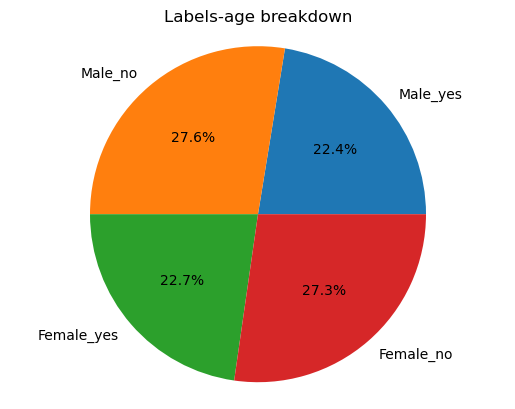

In [27]:

sizes = np.array([Male_yes,Male_no,Female_yes,Female_no])
labels='Male_yes','Male_no','Female_yes','Female_no'
plt.pie(sizes,labels = labels,autopct='%1.1f%%',startangle=0)
plt.title('Labels-age breakdown')
plt.axis('equal')
plt.show()

In [28]:
Young_no=0
Young_yes=0
Mid_no=0
Mid_yes=0
Old_yes=0
Old_no=0
for annotator,gender,year,op in zip(annotators,genders,ages,opinions): 
    for individual,gen,age,opinion in zip(annotator,gender,year,op): 
        if(age=="18-22" and opinion=="NO"):
        	Young_no+=1
        if(age=="18-22" and opinion=="YES"):
        	Young_yes+=1
        if(age=="23-45" and opinion=="NO"):
        	Mid_no+=1
        if(age=="23-45" and opinion=="YES"):
        	Mid_yes+=1
        if(age=="46+" and opinion=="NO"):
        	Old_no+=1
        if(age=='46+' and opinion=="YES"):
        	Old_yes+=1

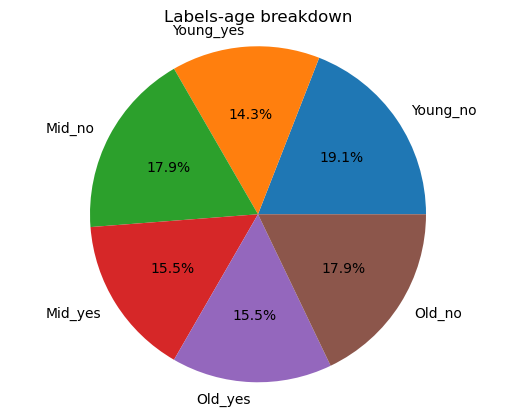

In [29]:
sizes = np.array([Young_no,Young_yes,Mid_no,Mid_yes,Old_yes,Old_no])
labels='Young_no','Young_yes','Mid_no','Mid_yes','Old_yes','Old_no'
plt.pie(sizes,labels = labels,autopct='%1.1f%%',startangle=0)
plt.title('Labels-age breakdown')
plt.axis('equal')
plt.show()

In [30]:
Dict_ambi={}
for ans in ambi_annotators: 
    for individual in ans: 
        l=[]
        if Dict_ambi.get(individual) is not None:
            Dict_ambi[individual][0]=Dict_ambi[individual][0]+1
        else:
            l.append(1)
            l.append(Dict_all[individual][1])
            l.append(Dict_all[individual][2])
            Dict_ambi[individual]=l
Dict_ambi=sorted(Dict_ambi.items(), key=lambda e: e[1][1])

In [31]:
Dict_ambi

[('Annotator_13', [8, 'F', '18-22']),
 ('Annotator_14', [8, 'F', '23-45']),
 ('Annotator_15', [8, 'F', '46+']),
 ('Annotator_25', [16, 'F', '18-22']),
 ('Annotator_26', [16, 'F', '23-45']),
 ('Annotator_27', [23, 'F', '46+']),
 ('Annotator_97', [10, 'F', '18-22']),
 ('Annotator_98', [10, 'F', '23-45']),
 ('Annotator_99', [10, 'F', '46+']),
 ('Annotator_103', [10, 'F', '18-22']),
 ('Annotator_104', [10, 'F', '23-45']),
 ('Annotator_105', [10, 'F', '46+']),
 ('Annotator_109', [4, 'F', '18-22']),
 ('Annotator_110', [4, 'F', '23-45']),
 ('Annotator_111', [4, 'F', '46+']),
 ('Annotator_31', [12, 'F', '18-22']),
 ('Annotator_32', [12, 'F', '23-45']),
 ('Annotator_33', [12, 'F', '46+']),
 ('Annotator_1', [5, 'F', '18-22']),
 ('Annotator_2', [5, 'F', '23-45']),
 ('Annotator_3', [5, 'F', '46+']),
 ('Annotator_133', [10, 'F', '18-22']),
 ('Annotator_134', [10, 'F', '23-45']),
 ('Annotator_135', [10, 'F', '46+']),
 ('Annotator_73', [9, 'F', '18-22']),
 ('Annotator_74', [9, 'F', '23-45']),
 ('Anno

In [32]:
annotators_en = english.annotators.to_numpy().flatten().tolist()
annotators_es = spanish.annotators.to_numpy().flatten().tolist()
annotators_en

[['Annotator_391',
  'Annotator_392',
  'Annotator_393',
  'Annotator_394',
  'Annotator_395',
  'Annotator_396'],
 ['Annotator_391',
  'Annotator_392',
  'Annotator_393',
  'Annotator_394',
  'Annotator_395',
  'Annotator_396'],
 ['Annotator_397',
  'Annotator_398',
  'Annotator_399',
  'Annotator_400',
  'Annotator_401',
  'Annotator_402'],
 ['Annotator_403',
  'Annotator_404',
  'Annotator_405',
  'Annotator_406',
  'Annotator_407',
  'Annotator_408'],
 ['Annotator_409',
  'Annotator_410',
  'Annotator_411',
  'Annotator_412',
  'Annotator_413',
  'Annotator_414'],
 ['Annotator_409',
  'Annotator_410',
  'Annotator_411',
  'Annotator_412',
  'Annotator_413',
  'Annotator_414'],
 ['Annotator_415',
  'Annotator_416',
  'Annotator_417',
  'Annotator_418',
  'Annotator_340',
  'Annotator_419'],
 ['Annotator_420',
  'Annotator_296',
  'Annotator_421',
  'Annotator_422',
  'Annotator_423',
  'Annotator_424'],
 ['Annotator_425',
  'Annotator_426',
  'Annotator_427',
  'Annotator_428',
  'A

In [33]:
Dict_CW = {}
sexist_en = sexist_en.set_index(sexist_en['id_EXIST'])
non_sexist_en = non_sexist_en.set_index(non_sexist_en['id_EXIST'])
for (i, ans) in enumerate(annotators_en):
	index = str(200000 + i + 1)
	if index in sexist_en.index:
		for (j, individual) in enumerate(ans):
			if Dict_CW.get(individual) is not None:
				if sexist_en.loc[sexist_en.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'YES':
					Dict_CW[individual][0] = Dict_CW[individual][0] + 1
				else:
					Dict_CW[individual][1] = Dict_CW[individual][1] + 1
			else:
				if sexist_en.loc[sexist_en.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'YES':
					Dict_CW[individual] = [1, 0]
				else:
					Dict_CW[individual] = [0, 1]
	elif index in non_sexist_en.index:
		for (j, individual) in enumerate(ans):
			if Dict_CW.get(individual) is not None:
				if non_sexist_en.loc[non_sexist_en.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'NO':
					Dict_CW[individual][0] = Dict_CW[individual][0] + 1
				else:
					Dict_CW[individual][1] = Dict_CW[individual][1] + 1
			else:
				if non_sexist_en.loc[non_sexist_en.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'NO':
					Dict_CW[individual] = [1, 0]
				else:
					Dict_CW[individual] = [0, 1]


In [34]:
sexist_es = sexist_es.set_index(sexist_es['id_EXIST'])
non_sexist_es = non_sexist_es.set_index(non_sexist_es['id_EXIST'])
for (i, ans) in enumerate(annotators_es):
	index = str(100000 + i + 1)
	if index in sexist_es.index:
		for (j, individual) in enumerate(ans):
			if Dict_CW.get(individual) is not None:
				if sexist_es.loc[sexist_es.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'YES':
					Dict_CW[individual][0] = Dict_CW[individual][0] + 1
				else:
					Dict_CW[individual][1] = Dict_CW[individual][1] + 1
			else:
				if sexist_es.loc[sexist_es.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'YES':
					Dict_CW[individual] = [1, 0]
				else:
					Dict_CW[individual] = [0, 1]
	elif index in non_sexist_es.index:
		for (j, individual) in enumerate(ans):
			if Dict_CW.get(individual) is not None:
				if non_sexist_es.loc[non_sexist_es.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'NO':
					Dict_CW[individual][0] = Dict_CW[individual][0] + 1
				else:
					Dict_CW[individual][1] = Dict_CW[individual][1] + 1
			else:
				if non_sexist_es.loc[non_sexist_es.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'NO':
					Dict_CW[individual] = [1, 0]
				else:
					Dict_CW[individual] = [0, 1]

In [35]:
ann_keys = list(Dict_CW.keys())
ann_keys_int = [int(s.split('_')[1]) for s in ann_keys]
ann_keys_new = [x for _,x in sorted(zip(ann_keys_int, ann_keys))]
Dict_CW_new = {i: Dict_CW[i] for i in ann_keys_new}
Dict_CW_new


{'Annotator_1': [39, 13],
 'Annotator_2': [48, 4],
 'Annotator_3': [42, 10],
 'Annotator_4': [49, 3],
 'Annotator_5': [46, 6],
 'Annotator_6': [45, 7],
 'Annotator_7': [45, 8],
 'Annotator_8': [48, 5],
 'Annotator_9': [48, 5],
 'Annotator_10': [44, 9],
 'Annotator_11': [45, 8],
 'Annotator_12': [39, 14],
 'Annotator_13': [43, 6],
 'Annotator_14': [44, 5],
 'Annotator_15': [34, 15],
 'Annotator_16': [38, 11],
 'Annotator_17': [44, 5],
 'Annotator_18': [40, 9],
 'Annotator_19': [49, 2],
 'Annotator_20': [45, 6],
 'Annotator_21': [44, 7],
 'Annotator_22': [38, 13],
 'Annotator_23': [36, 15],
 'Annotator_24': [44, 7],
 'Annotator_25': [30, 11],
 'Annotator_26': [37, 4],
 'Annotator_27': [80, 11],
 'Annotator_28': [32, 9],
 'Annotator_29': [35, 6],
 'Annotator_30': [30, 11],
 'Annotator_31': [29, 16],
 'Annotator_32': [42, 3],
 'Annotator_33': [39, 6],
 'Annotator_34': [40, 5],
 'Annotator_35': [39, 6],
 'Annotator_36': [41, 4],
 'Annotator_37': [45, 6],
 'Annotator_38': [43, 8],
 'Annotato

In [36]:
Dict_CW_list = list(Dict_CW_new.items())
Trust_Score = {i[0]: i[1][0]*100/np.sum(np.array(i[1])) for i in Dict_CW_list}
sorted(Trust_Score.items(),key=lambda e: e[1])

[('Annotator_353', 38.775510204081634),
 ('Annotator_700', 43.47826086956522),
 ('Annotator_99', 44.680851063829785),
 ('Annotator_232', 47.916666666666664),
 ('Annotator_725', 48.0),
 ('Annotator_617', 48.888888888888886),
 ('Annotator_445', 54.34782608695652),
 ('Annotator_527', 55.10204081632653),
 ('Annotator_89', 57.142857142857146),
 ('Annotator_414', 58.333333333333336),
 ('Annotator_608', 58.333333333333336),
 ('Annotator_648', 58.8235294117647),
 ('Annotator_46', 59.61538461538461),
 ('Annotator_143', 60.0),
 ('Annotator_685', 60.0),
 ('Annotator_123', 60.869565217391305),
 ('Annotator_71', 61.224489795918366),
 ('Annotator_120', 62.5),
 ('Annotator_31', 64.44444444444444),
 ('Annotator_88', 65.3061224489796),
 ('Annotator_325', 65.38461538461539),
 ('Annotator_589', 66.0),
 ('Annotator_380', 66.66666666666667),
 ('Annotator_382', 66.66666666666667),
 ('Annotator_455', 66.66666666666667),
 ('Annotator_262', 67.34693877551021),
 ('Annotator_643', 67.34693877551021),
 ('Annotato

In [49]:
sure_en=sexist_en.loc[sexist_en['labels_task1'].apply(lambda x:x.count('YES'))>3]
sure_en

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
id_EXIST,,,,,,,,,,,
200002,200002,en,Writing a uni essay in my local pub with a cof...,6,"[Annotator_391, Annotator_392, Annotator_393, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, NO, YES, YES]","[REPORTED, DIRECT, REPORTED, -, REPORTED, REPO...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, MIS...",TRAIN_EN
200003,200003,en,@UniversalORL it is 2021 not 1921. I dont appr...,6,"[Annotator_397, Annotator_398, Annotator_399, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, NO, YES]","[REPORTED, REPORTED, -, REPORTED, -, JUDGEMENTAL]","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [STEREOTY...",TRAIN_EN
200006,200006,en,According to a customer I have plenty of time ...,6,"[Annotator_409, Annotator_410, Annotator_411, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, REPORTED, REPORTED, REPORTED, REPOR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [S...",TRAIN_EN
200007,200007,en,"So only 'blokes' drink beer? Sorry, but if you...",6,"[Annotator_415, Annotator_416, Annotator_417, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, REPORTED, DIRECT, DIRE...","[[STEREOTYPING-DOMINANCE], [STEREOTYPING-DOMIN...",TRAIN_EN
200011,200011,en,#EverydaySexism means women usually end up in ...,6,"[Annotator_437, Annotator_438, Annotator_439, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, JUDGEMENTAL, JUDGEMENTAL, JUDGEMENT...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN_EN
...,...,...,...,...,...,...,...,...,...,...,...
203256,203256,en,idk why y’all bitches think having half your a...,6,"[Annotator_478, Annotator_479, Annotator_480, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, DIRECT, DIRECT, DIRECT, JUDGEMEN...","[[OBJECTIFICATION], [STEREOTYPING-DOMINANCE, S...",TRAIN_EN
203257,203257,en,This has been a part of an experiment with @Wo...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, JUDGEMENTAL, DIRECT, J...","[[OBJECTIFICATION], [OBJECTIFICATION], [OBJECT...",TRAIN_EN
203258,203258,en,"""Take me already"" ""Not yet. You gotta be ready...",6,"[Annotator_467, Annotator_468, Annotator_469, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, YES, YES]","[-, DIRECT, -, DIRECT, DIRECT, JUDGEMENTAL]","[[-], [OBJECTIFICATION], [-], [SEXUAL-VIOLENCE...",TRAIN_EN


In [52]:
labels2_en=sure_en.labels_task2.to_numpy().flatten().tolist()
labels2_en

[['REPORTED', 'DIRECT', 'REPORTED', '-', 'REPORTED', 'REPORTED'],
 ['REPORTED', 'REPORTED', '-', 'REPORTED', '-', 'JUDGEMENTAL'],
 ['REPORTED', 'REPORTED', 'REPORTED', 'REPORTED', 'REPORTED', 'JUDGEMENTAL'],
 ['JUDGEMENTAL', 'REPORTED', 'REPORTED', 'DIRECT', 'DIRECT', 'REPORTED'],
 ['REPORTED',
  'JUDGEMENTAL',
  'JUDGEMENTAL',
  'JUDGEMENTAL',
  'REPORTED',
  'JUDGEMENTAL'],
 ['DIRECT', '-', 'JUDGEMENTAL', 'REPORTED', 'REPORTED', '-'],
 ['DIRECT', 'JUDGEMENTAL', 'JUDGEMENTAL', 'DIRECT', 'REPORTED', 'DIRECT'],
 ['REPORTED', 'DIRECT', 'JUDGEMENTAL', 'DIRECT', 'DIRECT', 'DIRECT'],
 ['REPORTED', 'DIRECT', '-', 'JUDGEMENTAL', '-', 'REPORTED'],
 ['REPORTED', '-', 'JUDGEMENTAL', 'REPORTED', '-', 'JUDGEMENTAL'],
 ['REPORTED',
  'REPORTED',
  'REPORTED',
  'JUDGEMENTAL',
  'REPORTED',
  'JUDGEMENTAL'],
 ['JUDGEMENTAL', 'JUDGEMENTAL', 'JUDGEMENTAL', 'REPORTED', '-', 'JUDGEMENTAL'],
 ['JUDGEMENTAL',
  'JUDGEMENTAL',
  'REPORTED',
  'DIRECT',
  'REPORTED',
  'JUDGEMENTAL'],
 ['REPORTED', '-', 'JU

In [40]:
import re
df['hashtag'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))
from ekphrasis.classes.segmenter import Segmenter
seg_tw = Segmenter(corpus="twitter")

Reading twitter - 1grams ...
Reading twitter - 2grams ...


/home/kelkar/anaconda3/envs/ev/lib/python3.9/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [41]:
import preprocessor as p
text=[];
#forming a separate feature for cleaned tweets
for i,tweet in enumerate(df['tweet']):
    final=p.clean(str(tweet))
    
    text.append(final)
df["text"]=text
df

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,hashtag,text
100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,[],"Ignora al otro, es un capullo.El problema con ..."
100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES,[],Si comicsgate se parece en algo a gamergate pu...
100003,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES,[],"Lee sobre Gamergate, y como eso ha cambiado la..."
100004,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"[Annotator_13, Annotator_14, Annotator_15, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",TRAIN_ES,[],"Un retraso social bastante lamentable, gamerga..."
100005,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES,[],Entonces como as es el mercado lo mejor no es ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203256,203256,en,idk why y’all bitches think having half your a...,6,"[Annotator_478, Annotator_479, Annotator_480, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, DIRECT, DIRECT, DIRECT, JUDGEMEN...","[[OBJECTIFICATION], [STEREOTYPING-DOMINANCE, S...",TRAIN_EN,[],idk why yall bitches think having half your as...
203257,203257,en,This has been a part of an experiment with @Wo...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, JUDGEMENTAL, DIRECT, J...","[[OBJECTIFICATION], [OBJECTIFICATION], [OBJECT...",TRAIN_EN,[],This has been a part of an experiment with . W...
203258,203258,en,"""Take me already"" ""Not yet. You gotta be ready...",6,"[Annotator_467, Annotator_468, Annotator_469, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, YES, YES]","[-, DIRECT, -, DIRECT, DIRECT, JUDGEMENTAL]","[[-], [OBJECTIFICATION], [-], [SEXUAL-VIOLENCE...",TRAIN_EN,[],"""Take me already"" ""Not yet. You gotta be ready..."
203259,203259,en,@clintneedcoffee why do you look like a whore?...,6,"[Annotator_674, Annotator_675, Annotator_676, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, JUDGEMENTAL, ...","[[OBJECTIFICATION, SEXUAL-VIOLENCE, MISOGYNY-N...",TRAIN_EN,[],why do you look like a whore? /lh


In [42]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /home/kelkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kelkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
Dict_CW = {}
sexist_en = sexist_en.set_index(sexist_en['id_EXIST'])
non_sexist_en = non_sexist_en.set_index(non_sexist_en['id_EXIST'])
for (i, ans) in enumerate(annotators_en):
	index = str(200000 + i + 1)
	if index in sexist_en.index:
		for (j, individual) in enumerate(ans):
			if Dict_CW.get(individual) is not None:
				if sexist_en.loc[sexist_en.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'YES':
					Dict_CW[individual][0] = Dict_CW[individual][0] + 1
				else:
					Dict_CW[individual][1] = Dict_CW[individual][1] + 1
			else:
				if sexist_en.loc[sexist_en.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'YES':
					Dict_CW[individual] = [1, 0]
				else:
					Dict_CW[individual] = [0, 1]
	elif index in non_sexist_en.index:
		for (j, individual) in enumerate(ans):
			if Dict_CW.get(individual) is not None:
				if non_sexist_en.loc[non_sexist_en.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'NO':
					Dict_CW[individual][0] = Dict_CW[individual][0] + 1
				else:
					Dict_CW[individual][1] = Dict_CW[individual][1] + 1
			else:
				if non_sexist_en.loc[non_sexist_en.id_EXIST==index]['labels_task1'].tolist()[0][j] == 'NO':
					Dict_CW[individual] = [1, 0]
				else:
					Dict_CW[individual] = [0, 1]


0
['Annotator_391', 'Annotator_392', 'Annotator_393', 'Annotator_394', 'Annotator_395', 'Annotator_396']
1
['Annotator_391', 'Annotator_392', 'Annotator_393', 'Annotator_394', 'Annotator_395', 'Annotator_396']
2
['Annotator_397', 'Annotator_398', 'Annotator_399', 'Annotator_400', 'Annotator_401', 'Annotator_402']
3
['Annotator_403', 'Annotator_404', 'Annotator_405', 'Annotator_406', 'Annotator_407', 'Annotator_408']
4
['Annotator_409', 'Annotator_410', 'Annotator_411', 'Annotator_412', 'Annotator_413', 'Annotator_414']
5
['Annotator_409', 'Annotator_410', 'Annotator_411', 'Annotator_412', 'Annotator_413', 'Annotator_414']
6
['Annotator_415', 'Annotator_416', 'Annotator_417', 'Annotator_418', 'Annotator_340', 'Annotator_419']
7
['Annotator_420', 'Annotator_296', 'Annotator_421', 'Annotator_422', 'Annotator_423', 'Annotator_424']
8
['Annotator_425', 'Annotator_426', 'Annotator_427', 'Annotator_428', 'Annotator_429', 'Annotator_430']
9
['Annotator_431', 'Annotator_432', 'Annotator_433', '

In [46]:
df['text'] = df['text'].astype(str).str.replace('\d+', '',regex=True)
df['text']=df['text'].str.lower()
df.tail(40)



,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,hashtag,text
203221,203221,en,@AOC @RepAOC As a member of our Congress this...,6,"[Annotator_443, Annotator_444, Annotator_445, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, YES, YES]","[JUDGEMENTAL, DIRECT, -, DIRECT, JUDGEMENTAL, ...","[[STEREOTYPING-DOMINANCE], [STEREOTYPING-DOMIN...",TRAIN_EN,[],as a member of our congress this is extremely ...
203222,203222,en,"""This boy you look like a prostitute"" https://...",6,"[Annotator_265, Annotator_709, Annotator_710, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, NO, YES, YES, YES, YES]","[DIRECT, -, DIRECT, DIRECT, JUDGEMENTAL, DIRECT]","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_EN,[],"""this boy you look like a prostitute"""
203223,203223,en,"@Ngunjir_Wambugu Idiot, that tag makes you loo...",6,"[Annotator_473, Annotator_474, Annotator_475, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, JUDGEMENTAL, ...","[[MISOGYNY-NON-SEXUAL-VIOLENCE], [OBJECTIFICAT...",TRAIN_EN,[],"idiot, that tag makes you look like a prostitu..."
203224,203224,en,@yayroger @VictoriaRossi @IonaGuyF @MetsDaddy2...,6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, REPORTED, DIR...","[[STEREOTYPING-DOMINANCE], [MISOGYNY-NON-SEXUA...",TRAIN_EN,[],"dr. cox, does this shade of red make me look l..."
203225,203225,en,i think the new hottest fashion is clothes tha...,6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, YES, NO]","[DIRECT, DIRECT, -, DIRECT, DIRECT, -]","[[OBJECTIFICATION], [MISOGYNY-NON-SEXUAL-VIOLE...",TRAIN_EN,[],i think the new hottest fashion is clothes tha...
203226,203226,en,"#TheGoldenGirls S01, Ep01 - The Pilot#goldengi...",6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, YES, YES]","[DIRECT, DIRECT, -, DIRECT, JUDGEMENTAL, DIRECT]","[[OBJECTIFICATION], [SEXUAL-VIOLENCE, MISOGYNY...",TRAIN_EN,"[TheGoldenGirls, goldengirls]","s, ep - the pilot dorothy: its miami in june o..."
203227,203227,en,"Sharon: Oh, Loki, does this lipstick make me l...",6,"[Annotator_651, Annotator_652, Annotator_653, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, REPORTED, JUDGEMENTAL...","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [OBJECTIF...",TRAIN_EN,[],"sharon: oh, loki, does this lipstick make me l..."
203228,203228,en,@jcmfanclub @JohnCMcGinley No it makes you loo...,6,"[Annotator_651, Annotator_652, Annotator_653, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, JUDGEMENTAL, JUDGEMENTAL, DIRECT, JUD...","[[SEXUAL-VIOLENCE], [MISOGYNY-NON-SEXUAL-VIOLE...",TRAIN_EN,[],no it makes you look like a prostitute that ca...
203229,203229,en,Several years ago this girl tried to insult me...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, REPORTED, JUDGEMENTAL, DIRECT, REPORT...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, SEX...",TRAIN_EN,[],several years ago this girl tried to insult me...
203230,203230,en,@bonheurchasse A wise woman once said the wron...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, JUDGEMENTAL, DIRECT, JUDGEMEN...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN_EN,[],a wise woman once said the wrong one and you l...


In [63]:
sure_en = sure_en.set_index(sure_en['id_EXIST'])
sure_en.describe()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
count,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137
unique,1137,1,1137,1,58,1,1,22,788,1122,1
top,200002,en,Writing a uni essay in my local pub with a cof...,6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DIRECT]","[[IDEOLOGICAL-INEQUALITY], [-], [IDEOLOGICAL-I...",TRAIN_EN
freq,1,1137,1,1137,35,1137,1137,322,47,3,1137


In [47]:
train_Yes=pd.read_json('training/EXIST2023_training.json')
train_Yes=train_Yes.transpose()
train_Yes=train_Yes.loc[train_Yes['lang'].apply(lambda x:x=='en')]
train_Yes=train_Yes.loc[train_Yes['labels_task1'].apply(lambda x:x.count('YES')>3)]
train_Yes['label1']='YES'
train_Yes

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,label1
200002,200002,en,Writing a uni essay in my local pub with a cof...,6,"[Annotator_391, Annotator_392, Annotator_393, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, NO, YES, YES]","[REPORTED, DIRECT, REPORTED, -, REPORTED, REPO...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, MIS...",TRAIN_EN,YES
200003,200003,en,@UniversalORL it is 2021 not 1921. I dont appr...,6,"[Annotator_397, Annotator_398, Annotator_399, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, NO, YES]","[REPORTED, REPORTED, -, REPORTED, -, JUDGEMENTAL]","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [STEREOTY...",TRAIN_EN,YES
200006,200006,en,According to a customer I have plenty of time ...,6,"[Annotator_409, Annotator_410, Annotator_411, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, REPORTED, REPORTED, REPORTED, REPOR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [S...",TRAIN_EN,YES
200007,200007,en,"So only 'blokes' drink beer? Sorry, but if you...",6,"[Annotator_415, Annotator_416, Annotator_417, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, REPORTED, DIRECT, DIRE...","[[STEREOTYPING-DOMINANCE], [STEREOTYPING-DOMIN...",TRAIN_EN,YES
200011,200011,en,#EverydaySexism means women usually end up in ...,6,"[Annotator_437, Annotator_438, Annotator_439, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, JUDGEMENTAL, JUDGEMENTAL, JUDGEMENT...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN_EN,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
203256,203256,en,idk why y’all bitches think having half your a...,6,"[Annotator_478, Annotator_479, Annotator_480, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, DIRECT, DIRECT, DIRECT, JUDGEMEN...","[[OBJECTIFICATION], [STEREOTYPING-DOMINANCE, S...",TRAIN_EN,YES
203257,203257,en,This has been a part of an experiment with @Wo...,6,"[Annotator_668, Annotator_669, Annotator_670, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, JUDGEMENTAL, DIRECT, J...","[[OBJECTIFICATION], [OBJECTIFICATION], [OBJECT...",TRAIN_EN,YES
203258,203258,en,"""Take me already"" ""Not yet. You gotta be ready...",6,"[Annotator_467, Annotator_468, Annotator_469, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, YES, YES]","[-, DIRECT, -, DIRECT, DIRECT, JUDGEMENTAL]","[[-], [OBJECTIFICATION], [-], [SEXUAL-VIOLENCE...",TRAIN_EN,YES
203259,203259,en,@clintneedcoffee why do you look like a whore?...,6,"[Annotator_674, Annotator_675, Annotator_676, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, JUDGEMENTAL, ...","[[OBJECTIFICATION, SEXUAL-VIOLENCE, MISOGYNY-N...",TRAIN_EN,YES


In [48]:
train_No=pd.read_json('training/EXIST2023_training.json')
train_No=train_No.transpose()
train_No=train_No.loc[train_No['lang'].apply(lambda x:x=='en')]
train_No=train_No.loc[train_No['labels_task1'].apply(lambda x:x.count('NO')>3)]
train_No['label1']='NO'
train_No


,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,label1
200008,200008,en,New to the shelves this week - looking forward...,6,"[Annotator_420, Annotator_296, Annotator_421, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, YES, NO, NO]","[-, -, -, JUDGEMENTAL, -, -]","[[-], [-], [-], [IDEOLOGICAL-INEQUALITY], [-],...",TRAIN_EN,NO
200010,200010,en,I guess that’s fairly normal for a Neanderthal...,6,"[Annotator_431, Annotator_432, Annotator_433, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, JUDGEMENTAL, -]","[[-], [-], [-], [-], [OBJECTIFICATION, SEXUAL-...",TRAIN_EN,NO
200023,200023,en,@JavedLSterritt He's really shit on games jour...,6,"[Annotator_496, Annotator_497, Annotator_498, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, YES, NO, NO]","[-, -, -, JUDGEMENTAL, -, -]","[[-], [-], [-], [IDEOLOGICAL-INEQUALITY, STERE...",TRAIN_EN,NO
200024,200024,en,"Low key, she was fr created because the Incred...",6,"[Annotator_502, Annotator_503, Annotator_504, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, NO, YES]","[-, -, -, -, -, JUDGEMENTAL]","[[-], [-], [-], [-], [-], [STEREOTYPING-DOMINA...",TRAIN_EN,NO
200025,200025,en,"One of the most important (and of course, unde...",6,"[Annotator_508, Annotator_509, Annotator_510, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_EN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
203180,203180,en,"@BFriedmanDC ""The other officers yell after Jo...",6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, NO, NO]","[-, REPORTED, -, -, -, -]","[[-], [STEREOTYPING-DOMINANCE], [-], [-], [-],...",TRAIN_EN,NO
203201,203201,en,@v1sig0th @PTSDGuts2 Get off your goddamn high...,6,"[Annotator_508, Annotator_509, Annotator_510, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, YES, NO]","[-, DIRECT, -, -, DIRECT, -]","[[-], [SEXUAL-VIOLENCE], [-], [-], [STEREOTYPI...",TRAIN_EN,NO
203202,203202,en,I hate the phrase “when you assume it makes an...,6,"[Annotator_703, Annotator_704, Annotator_705, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, NO, NO]","[-, DIRECT, -, DIRECT, -, -]","[[-], [OBJECTIFICATION], [-], [STEREOTYPING-DO...",TRAIN_EN,NO
203205,203205,en,To the guy who beeped at me after I'd put my h...,6,"[Annotator_645, Annotator_646, Annotator_647, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, NO, NO, NO, YES, NO]","[REPORTED, -, -, -, DIRECT, -]","[[STEREOTYPING-DOMINANCE], [-], [-], [-], [STE...",TRAIN_EN,NO


In [49]:
frames = [train_Yes, train_No]
result = pd.concat(frames)
display(result)

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,label1
200002,200002,en,Writing a uni essay in my local pub with a cof...,6,"[Annotator_391, Annotator_392, Annotator_393, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, NO, YES, YES]","[REPORTED, DIRECT, REPORTED, -, REPORTED, REPO...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, MIS...",TRAIN_EN,YES
200003,200003,en,@UniversalORL it is 2021 not 1921. I dont appr...,6,"[Annotator_397, Annotator_398, Annotator_399, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, NO, YES]","[REPORTED, REPORTED, -, REPORTED, -, JUDGEMENTAL]","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [STEREOTY...",TRAIN_EN,YES
200006,200006,en,According to a customer I have plenty of time ...,6,"[Annotator_409, Annotator_410, Annotator_411, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, REPORTED, REPORTED, REPORTED, REPOR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [S...",TRAIN_EN,YES
200007,200007,en,"So only 'blokes' drink beer? Sorry, but if you...",6,"[Annotator_415, Annotator_416, Annotator_417, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, REPORTED, DIRECT, DIRE...","[[STEREOTYPING-DOMINANCE], [STEREOTYPING-DOMIN...",TRAIN_EN,YES
200011,200011,en,#EverydaySexism means women usually end up in ...,6,"[Annotator_437, Annotator_438, Annotator_439, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, JUDGEMENTAL, JUDGEMENTAL, JUDGEMENT...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN_EN,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
203180,203180,en,"@BFriedmanDC ""The other officers yell after Jo...",6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, NO, NO]","[-, REPORTED, -, -, -, -]","[[-], [STEREOTYPING-DOMINANCE], [-], [-], [-],...",TRAIN_EN,NO
203201,203201,en,@v1sig0th @PTSDGuts2 Get off your goddamn high...,6,"[Annotator_508, Annotator_509, Annotator_510, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, YES, NO]","[-, DIRECT, -, -, DIRECT, -]","[[-], [SEXUAL-VIOLENCE], [-], [-], [STEREOTYPI...",TRAIN_EN,NO
203202,203202,en,I hate the phrase “when you assume it makes an...,6,"[Annotator_703, Annotator_704, Annotator_705, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, NO, NO]","[-, DIRECT, -, DIRECT, -, -]","[[-], [OBJECTIFICATION], [-], [STEREOTYPING-DO...",TRAIN_EN,NO
203205,203205,en,To the guy who beeped at me after I'd put my h...,6,"[Annotator_645, Annotator_646, Annotator_647, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, NO, NO, NO, YES, NO]","[REPORTED, -, -, -, DIRECT, -]","[[STEREOTYPING-DOMINANCE], [-], [-], [-], [STE...",TRAIN_EN,NO


In [50]:
tweets=[]
for tweet in result['tweet']:
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split())
    tweets.append(tweet)
result['tweet']=tweets
result['tweet']=result['tweet'].str.lower()

In [95]:
direct=0
reported=0
judgemental=0
unknown=0
labels_task2=sure_en['labels_task2'].to_list()
for labels in labels_task2:
    map={'d':0,'u':0,'j':0,'r':0}
    for label in labels:
        if(label=='REPORTED'):
           	map['r']+=1
        if(label=='DIRECT'):
          	map['d']+=1
        if(label=='JUDGEMENTAL'):
           	map['j']+=1
        if(label=='UNKNOWN'):
           	map['u']+=1
    for element in map:
        ans=0
        if(map[element]>ans):
            ans=map[element]
            majority=element
    if(label=='REPORTED'):
          reported+=1
    if(label=='DIRECT'):
            direct+=1
    if(label=='JUDGEMENTAL'):
          judgemental+=1
    if(label=='UNKNOWN'):
           unknown+=1
print(direct)
print(reported)
print(judgemental)
print(unknown)  
ambiguous=sure_en.shape[0]-direct-reported-judgemental-unknown
print(ambiguous)

444
227
283
5
178


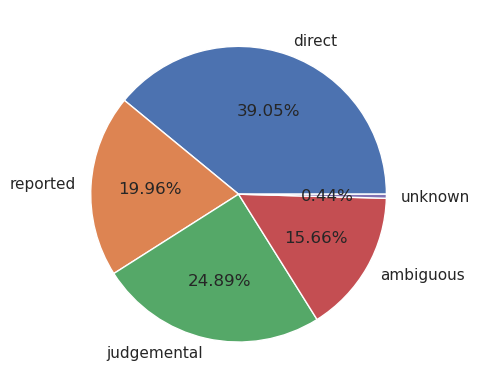

In [102]:
import matplotlib.pyplot as plt
import seaborn
  
data = [direct,reported,judgemental,ambiguous,unknown]
keys = ['direct', 'reported', 'judgemental', 'ambiguous', 'unknown']
 
palette_color = seaborn.color_palette('deep')
  
plt.pie(data, labels=keys, colors=palette_color, autopct='%.2f%%')
  
plt.show()

In [51]:
result

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,label1
200002,200002,en,writing a uni essay in my local pub with a cof...,6,"[Annotator_391, Annotator_392, Annotator_393, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, NO, YES, YES]","[REPORTED, DIRECT, REPORTED, -, REPORTED, REPO...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, MIS...",TRAIN_EN,YES
200003,200003,en,it is 2021 not 1921. i dont appreciate that on...,6,"[Annotator_397, Annotator_398, Annotator_399, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, NO, YES]","[REPORTED, REPORTED, -, REPORTED, -, JUDGEMENTAL]","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [STEREOTY...",TRAIN_EN,YES
200006,200006,en,according to a customer i have plenty of time ...,6,"[Annotator_409, Annotator_410, Annotator_411, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, REPORTED, REPORTED, REPORTED, REPOR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [S...",TRAIN_EN,YES
200007,200007,en,"so only 'blokes' drink beer? sorry, but if you...",6,"[Annotator_415, Annotator_416, Annotator_417, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, REPORTED, DIRECT, DIRE...","[[STEREOTYPING-DOMINANCE], [STEREOTYPING-DOMIN...",TRAIN_EN,YES
200011,200011,en,means women usually end up in lower paid suppo...,6,"[Annotator_437, Annotator_438, Annotator_439, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, JUDGEMENTAL, JUDGEMENTAL, JUDGEMENT...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN_EN,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
203180,203180,en,"""the other officers yell after jones repeatedl...",6,"[Annotator_617, Annotator_618, Annotator_619, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, NO, NO]","[-, REPORTED, -, -, -, -]","[[-], [STEREOTYPING-DOMINANCE], [-], [-], [-],...",TRAIN_EN,NO
203201,203201,en,get off your goddamn high horse dude. 40k is e...,6,"[Annotator_508, Annotator_509, Annotator_510, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, NO, YES, NO]","[-, DIRECT, -, -, DIRECT, -]","[[-], [SEXUAL-VIOLENCE], [-], [-], [STEREOTYPI...",TRAIN_EN,NO
203202,203202,en,i hate the phrase “when you assume it makes an...,6,"[Annotator_703, Annotator_704, Annotator_705, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[NO, YES, NO, YES, NO, NO]","[-, DIRECT, -, DIRECT, -, -]","[[-], [OBJECTIFICATION], [-], [STEREOTYPING-DO...",TRAIN_EN,NO
203205,203205,en,to the guy who beeped at me after i'd put my h...,6,"[Annotator_645, Annotator_646, Annotator_647, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, NO, NO, NO, YES, NO]","[REPORTED, -, -, -, DIRECT, -]","[[STEREOTYPING-DOMINANCE], [-], [-], [-], [STE...",TRAIN_EN,NO


In [52]:
l=[]
for tweet in result['tweet']:
	l.append(tweet)
l

['writing a uni essay in my local pub with a coffee. random old man keeps asking me drunk questions when i\'m trying to concentrate &amp; ends with "good luck, but you\'ll just end up getting married and not use it anyway". is alive and well 🙃',
 'it is 2021 not 1921. i dont appreciate that on two rides by myself your team member looked behind me and asked the man behind how many in my party. not impressed',
 'according to a customer i have plenty of time to go spent the stirling coins he wants to pay me with, in derry. "just like any other woman, i\'m sure of it." in retail.',
 "so only 'blokes' drink beer? sorry, but if you aren't a 'bloke' you drink wine apparently....... alive and well in https://t.co/ap4geusmox",
 "means women usually end up in lower paid support work; when that starts to change, traditionalists notice unfairness that previously hasn't bothered them at all. https://t.co/yolj9v8e6z",
 '_aid hi orla. interesting piece. on no 2. as a policy response, do you believe e

In [53]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


/home/kelkar/anaconda3/envs/ev/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
def process_data(row):

    text = row['tweet']
    text = str(text)
    text = ' '.join(text.split())

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128)

    label = 0
    if row['label1'] == 'YES':
        label += 1

    encodings['label'] = label
    encodings['text'] = text

    return encodings

In [55]:
print(process_data({
    'tweet': 'it is 2021 not 1921. I dont appreciate that on two rides by myself your team member looked behind me and asked the man behind how many in my party. Not impressed',
    'label1': 'YES'
}))


{'input_ids': [101, 2009, 2003, 25682, 2025, 4885, 1012, 1045, 2123, 2102, 9120, 2008, 2006, 2048, 12271, 2011, 2870, 2115, 2136, 2266, 2246, 2369, 2033, 1998, 2356, 1996, 2158, 2369, 2129, 2116, 1999, 2026, 2283, 1012, 2025, 7622, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [56]:
processed_data = []

for i in range(len(result)):
    processed_data.append(process_data(result.iloc[i]))

In [57]:
from sklearn.model_selection import train_test_split

new_df = pd.DataFrame(processed_data)

train_df, valid_df = train_test_split(
    new_df,
    test_size=0.2,
    random_state=2022
)

In [59]:
import pyarrow as pa
from datasets import Dataset
train_hg = Dataset(pa.Table.from_pandas(train_df))
valid_hg = Dataset(pa.Table.from_pandas(valid_df))

In [60]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [61]:
from transformers import TrainingArguments,Trainer

training_args = TrainingArguments(output_dir="./result", evaluation_strategy="epoch")

trainer = Trainer(
	model=model,
    args=training_args,
    train_dataset=train_hg,
    eval_dataset=valid_hg,
    tokenizer=tokenizer
)

2023-04-11 10:18:04.195621: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [62]:
X=list(result['tweet'])

In [63]:
y=list(result['label1'])


In [64]:
y=list(pd.get_dummies(y,drop_first=True)['YES'])

In [65]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [67]:
from transformers import DistilBertTokenizerFast
tokenizer= DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [68]:
train_encodings=tokenizer(X_train,truncation=True,padding=True)
test_encodings=tokenizer(X_test,truncation=True,padding=True)

In [69]:
import tensorflow as tf


train_dataset=tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))
test_dataset=tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

2023-04-11 10:18:08.379662: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-11 10:18:08.385686: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-11 10:18:08.427010: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-11 10:18:08.427031: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kelkar-Lenovo-Legion-5-15IMH05): /proc/driver/nvidia/version does not exist
2023-04-11 10:18:08.428173: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [70]:

from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

In [73]:

with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset             # evaluation dataset
)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use i

In [74]:
trainer.train()

2023-04-11 10:19:01.715096: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding as we cannot find appropriate reader dataset op(s) to shard. Error: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT32
      type: DT_INT32
      type: DT_INT32
    }
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 114
        }
      }
      shape {
        dim {
          size: 114
        }
      }
      shape {
      }
    }
  }
}



TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [75]:
trainer.evaluate(test_dataset)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2023-04-11 10:19:51.993101: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding as we cannot find appropriate reader dataset op(s) to shard. Error: Found an unshardable source dataset: name: "TensorSliceDataset/_3"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
input: "Placeholder/_2"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_INT32
      type: DT_INT32
      type: DT_INT32
    }
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 102
        }
      }
      shape {
        dim {
          size: 102
        }
      }
      shape {
      }
    }
  }
}



{'eval_loss': 0.6922910478379991}

In [ ]:
trainer.predict(test_dataset)[1]

In [ ]:
output=trainer.predict(test_dataset)[1]

In [ ]:

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,output)
cm
     


In [ ]:
trainer.save_model('sexism_model')

In [ ]:
def compute_metrics(eval_preds):
    metric = evaluate.load("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)"mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

In [ ]:
model = create_model()

In [ ]:
preds = np.argmax(predictions.predictions, axis=-1)